## Portal Assets Analysis
Before importing the csv file, clean it and save as csv-utf8.
Clean: reformat create and update date columns to be actual dates; standardize data_provided_by column as best as you can.
Remove any 'test' datasets before importing (search 'name' and 'description' for "test", but look out for lead testing datasets).  Remove any gis datasets since the metadata is imported (easiest thing is to search the licenses, also all are type 'href').  This code ignores private datasets that have public derived views (like charts and maps).

In [17]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [18]:
#This shows your working directory:
#os.getcwd()

#Read the csv into a dataframe. If your path name has a folder starting with 'u', you'll need double '\'
df = pd.read_csv('Documents\\UW\\ODL\\code\\asset24june.csv')


#print(df.info())  # check the data frame info
#df.head()  #Check the first five rows of data

### Rename Columns
Replaces column names in place

In [19]:
df.rename({"URL": "url",
"U ID": "uid",
"Public": "public",
"Derived View": "derived",
"Parent UID": "parentUid",
"Domain": "domain",
"Type": "type",
"Name": "name",
"Description": "description",
"Visits": "visits",
"Creation Date": "creationDate",
"Last Update Date (data)": "lastUpdateData",
"Category": "category",
"Keywords": "keywords",
"Downloads": "downloads",
"Owner": "owner",
"Contact Email": "contactEmail",
"License": "license",
"Publication Stage": "publicationStage",
"Published Version Name": "publishedVersionName",
"Published Version UID": "publishedVersionUid",
"data_provided_by": "data_provided_by",
"3": "notes3",
"Period of Time": "periodOfTime",
"4": "notes4",
"Publishing Department": "publishingDepartment",
"routing_approval": "routing_approval",
"6": "notes6",
"api_endpoint": "api_endpoint",
"5": "notes5",
"2": "notes2",
"Posting Frequency": "postingFreq",
"1": "notes1",
"source_link": "source_link",
"owner_uid": "owner_uid",
"View Moderation Status": "viewModerationStatus",
"provenance": "provenance",
"capabilities": "capabilities",
"supportedQueryFormats": "supportedQueryFormats",
"htmlPopupType": "htmlPopupType",
"copyrightText": "copyrightText",
"geometryType": "geometryType",
"Spatial Reference wkid": "spatialRefwkid",
"Source": "source",
"fields": "fields",
"displayField": "displayField",
"Last Update": "lastUpdate",
"Endpoint": "endPoint",
"Public Access Level": "publicAccessLevel",
"Geographic Coverage": "geographicCoverage",
"Unique Identifier": "uniqueIdentifier",
"Publisher": "publisher",
"Homepage": "homepage",
"Theme": "theme",
"Issued": "issued",
"Contact Name": "contactName",
"Originator": "originator",
"Metadata Language": "metadataLang",
"Data Definition": "dataDefinition",
"Data Frequency": "dataFreq",
"Data Source": "dataSource",
"Target Rationale": "targetRational",
"Level of Influence": "levelOfInfluence",
"Contact Email (custom)": "contactEmailCustom",
"Program Code": "programCode",
"Contact Point": "contactPoint",
"Bureau Code": "bureauCode"}, axis=1, inplace=True)

### Add a column showing base asset (parent asset)

In [20]:
df['allParentUid'] = np.nan #Adds empty column

#Tried to do it all at once, doesn't work:
#df['allParentUid'] = df.apply(
#    lambda row: row['uid'] if np.isnan(row['parentUid']) else row['parentUid'],
#    axis=1
#)

df['allParentUid'].fillna(df['parentUid'], inplace=True) #This works replacing NaN with parentUid
df.loc[(pd.isnull(df.allParentUid)), 'allParentUid'] = df.uid #This works to put all the uids into allParentUid- but is this just a copy?

#df.head()

### Create a dataframe for assessing metadata completeness
Available metadata: Description, Contact Email, License, data_provided_by, source_link, Keywords, Category, Originator, Metadata Language, Period of Time
Core Metadata: Description, Category, Provided By, License

Text(0.5, 0, 'Number of core metadata elements')

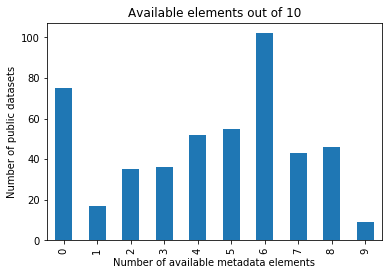

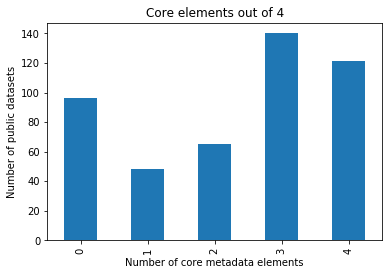

In [8]:
#Available metadata dataframe of public datasets
metadf = df[df['type'] == 'dataset']
metadf = metadf[metadf['public'] == 1]
metadf = metadf[["uid",
"description",
"category",
"keywords",
"contactEmail",
"license",
"data_provided_by",
"periodOfTime",
"postingFreq",
"originator"]]

#Count number of available metadata fields filled (not NaN)(and subtract the uid)
ametadf = metadf.count(axis='columns')-1
ametadf = pd.DataFrame({'origIndex':ametadf.index, 'counts':ametadf.values}) #Converts the series to a dataframe

ametadf = ametadf.counts.value_counts() #uses matlibplot to count rows for each count

ametadf = pd.DataFrame({'numElements':ametadf.index, 'counts':ametadf.values}) #Converts the series to a dataframe
ametadf = ametadf.sort_values('numElements',ascending=True) #sort the rows

#plot the counts
ametadf.plot(y='counts', kind='bar', x='numElements', legend=False, title='Available elements out of 10')
plt.ylabel('Number of public datasets') #Gets rid of the "Counts lable"
plt.xlabel('Number of available metadata elements')


#Core Metadata DataFrame
cmetadf = metadf[["uid",
"description",
"category",
"license",
"data_provided_by"]]

#Count number of core metadata elements filled (not NaN)(and subtract the uid)
cmetadf = cmetadf.count(axis='columns')-1
cmetadf = pd.DataFrame({'origIndex':cmetadf.index, 'counts':cmetadf.values}) #Converts the series to a dataframe

cmetadf = cmetadf.counts.value_counts() #uses matlibplot to count rows for each count

cmetadf = pd.DataFrame({'numElements':cmetadf.index, 'counts':cmetadf.values}) #Converts the series to a dataframe
cmetadf = cmetadf.sort_values('numElements',ascending=True) #sort the rows

#plot the counts
cmetadf.plot(y='counts', kind='bar', x='numElements', legend=False, title='Core elements out of 4')
plt.ylabel('Number of public datasets') #Gets rid of the "Counts lable"
plt.xlabel('Number of core metadata elements')



### Fill NaN vlaues in 'description' with 'null' to allow indexing

In [21]:
df['description'].fillna('null', inplace=True)

### Plot the top five types of datasets and include an 'others' type as well

Text(0, 0.5, '')

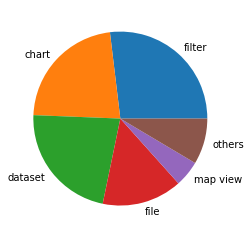

In [22]:
pltdf = df.type.value_counts() #uses matlibplot to count rows for each type

pltdf = pd.DataFrame({'type':pltdf.index, 'counts':pltdf.values}) #Converts the series to a dataframe

pltdf2 = pltdf[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row = pd.DataFrame(data = {
    'type' : ['others'],
    'counts' : [pltdf['counts'][5:].sum()]
})


pltdf2 = pd.concat([pltdf2, new_row]) #Add the 'others' value to the top 5 dataframe

#https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
#https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
#http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


#plot the types
pltdf2.plot(y='counts', kind='pie', labels=pltdf2.type, legend=False)
plt.ylabel('') #Gets rid of the "Counts label"


In [23]:
#pie chart of all the types
#df.type.value_counts().plot(kind='pie')
#plt.axis('equal')
#plt.title('Number of appearances in dataset')


### Create a dataframe of public assets

In [24]:
mask = df[df['public'] == 1]
dfpub = mask[["url",
"uid",
"public",
"type",
"name",
"description",
"visits",
"creationDate",
"lastUpdateData",
"category",
"keywords",
"downloads",
"owner",
"contactEmail",
"license",
"publicationStage",
"data_provided_by",
"periodOfTime",
"postingFreq",
"source_link",
"owner_uid",
"source",
"contactName",
"originator",
"metadataLang",
"allParentUid"]]
print(dfpub.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 1 to 3662
Data columns (total 26 columns):
url                 2168 non-null object
uid                 2168 non-null object
public              2168 non-null object
type                2168 non-null object
name                2168 non-null object
description         2168 non-null object
visits              2168 non-null float64
creationDate        2168 non-null object
lastUpdateData      2168 non-null object
category            1420 non-null object
keywords            1416 non-null object
downloads           2168 non-null float64
owner               2168 non-null object
contactEmail        554 non-null object
license             457 non-null object
publicationStage    2168 non-null object
data_provided_by    788 non-null object
periodOfTime        195 non-null object
postingFreq         294 non-null object
source_link         530 non-null object
owner_uid           2168 non-null object
source              0 non-null objec

### Types of Public assets

Text(0, 0.5, '')

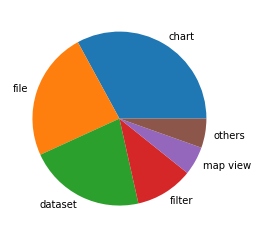

In [25]:
pltdfpub = dfpub.type.value_counts() #uses matlibplot to count rows for each type

pltdfpub = pd.DataFrame({'type':pltdfpub.index, 'counts':pltdfpub.values}) #Converts the series to a dataframe

pltdfpub2 = pltdfpub[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row = pd.DataFrame(data = {
    'type' : ['others'],
    'counts' : [pltdfpub['counts'][5:].sum()]
})


pltdfpub2 = pd.concat([pltdfpub2, new_row]) #Add the 'others' value to the top 5 dataframe


#plot the types
pltdfpub2.plot(y='counts', kind='pie', labels=pltdfpub2.type, legend=False)
plt.ylabel('') #Gets rid of the "Counts label"

### Public Datasets

In [26]:
mask = df[df['type'] == 'dataset']
mask = mask[mask['public'] == 1]
dfpubd = mask[["url",
"uid",
"public",
"type",
"name",
"description",
"visits",
"creationDate",
"lastUpdateData",
"category",
"keywords",
"downloads",
"owner",
"contactEmail",
"license",
"publicationStage",
"data_provided_by",
"periodOfTime",
"postingFreq",
"source_link",
"owner_uid",
"source",
"contactName",
"originator",
"metadataLang",
"allParentUid"]]


### Public Datasets by Category

C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Text(0, 0.5, '')

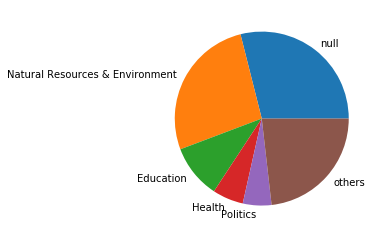

In [27]:
dfpubd['category'].fillna('null', inplace=True) #Fill NaN cells with 'null'

pltdfpubd = dfpubd.category.value_counts() #uses matlibplot to count rows for each type

pltdfpubd = pd.DataFrame({'category':pltdfpubd.index, 'counts':pltdfpubd.values}) #Converts the series to a dataframe

pltdfpubd2 = pltdfpubd[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row2 = pd.DataFrame(data = {
    'category' : ['others'],
    'counts' : [pltdfpubd['counts'][5:].sum()]
})

pltdfpubd2 = pd.concat([pltdfpubd2, new_row2]) #Add the 'others' value to the top 5 dataframe


#plot the types
pltdfpubd2.plot(y='counts', kind='pie', labels=pltdfpubd2.category, legend=False)
plt.ylabel('') #Gets rid of the "Counts label"



### Public Dataset Downloads and Visits

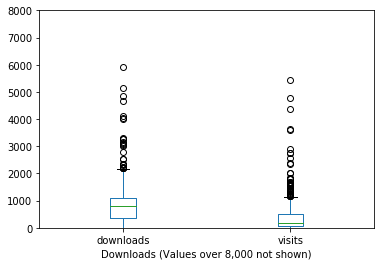

In [28]:

ax = dfpubd.boxplot(column=['downloads', 'visits'], return_type='axes', grid=False)

ax.set_ylim(0, 8000)
plt.xlabel('Downloads (Values over 8,000 not shown)')

plt.show()

#dfpubd['downloads'].head()

#dfpubd.boxplot(column=['downloads'])